In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix

# load dataset from csv file to pandas dataframe
df = pd.read_csv('machine-learning/csv/customer_staying_or_not.csv')
# drop the least explaining features (used Backward Stepwise Selection for choosing these features)
df.drop(columns=[
    'Gender', 'EstimatedSalary', 'HasCrCard', 'Balance', 'RowNumber', 'CustomerId', 'Surname'
    ], inplace=True)

y = df.pop('Exited')    # return target values and drop them from dataframe
X = df

X.head()                # verify

,CreditScore,Geography,Age,Tenure,NumOfProducts,IsActiveMember
0,619,France,42,2,1,1
1,608,Spain,41,1,1,1
2,502,France,42,8,3,0
3,699,France,39,1,2,0
4,850,Spain,43,2,1,1


In [30]:
X = pd.get_dummies(X) # convert ALL text-columns to categorical variables (One Hot encoding)
columnNames = list(X.columns) # grab column-names before converting to numpy array

X.head()

,CreditScore,Age,Tenure,NumOfProducts,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,1,1,1,0,0
1,608,41,1,1,1,0,0,1
2,502,42,8,3,0,1,0,0
3,699,39,1,2,0,1,0,0
4,850,43,2,1,1,0,0,1


In [31]:
X = X.values    # convert from Pandas dataframe to numpy array
y = y.values

print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )

(10000, 8)
(10000, 8)


In [32]:
print(X.shape[1])   # length of input vectors needed to decide input shape below

8


In [33]:
# Use keras functional API to include the Normalization in the model
# (save the hassle of normalizing input data before predicting with the trained model)

# create a Normalization layer and set its internal state using the training data
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train)

# create a model that include the normalization layer
inputs = tf.keras.Input(shape=(X.shape[1],))            # create inputs
x = normalizer(inputs)                                  # feed the normalizer with input data
x = tf.keras.layers.Dense(16, activation='relu')(x)     # feed the Dense layer with output from normalizer
x = tf.keras.layers.Dense(32, activation='relu')(x)     # feed layer with output from previous layer
x = tf.keras.layers.Dense(16, activation='relu')(x)     # -- || --

output = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # the last layer is the output
model = tf.keras.Model(inputs, output)                      # create the model

adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

2022-11-05 12:14:37.841005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-05 12:14:37.855625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [34]:

history = model.fit(X_train,y_train,epochs=50, batch_size=64, validation_data=(X_test,y_test))

Epoch 1/50
  8/125 [>.............................] - ETA: 0s - loss: 0.6633 - accuracy: 0.6211 

2022-11-05 12:14:38.545420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


119/125 [===========================>..] - ETA: 0s - loss: 0.5077 - accuracy: 0.7860

2022-11-05 12:14:39.608859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 1s 10ms/step - loss: 0.5048 - accuracy: 0.7875 - val_loss: 0.4178 - val_accuracy: 0.8215
Epoch 2/50
125/125 [==============================] - 1s 8ms/step - loss: 0.4133 - accuracy: 0.8283 - val_loss: 0.3814 - val_accuracy: 0.8540
Epoch 3/50
125/125 [==============================] - 1s 8ms/step - loss: 0.3875 - accuracy: 0.8451 - val_loss: 0.3609 - val_accuracy: 0.8560
Epoch 4/50
125/125 [==============================] - 1s 8ms/step - loss: 0.3719 - accuracy: 0.8509 - val_loss: 0.3613 - val_accuracy: 0.8540
Epoch 5/50
125/125 [==============================] - 1s 7ms/step - loss: 0.3655 - accuracy: 0.8523 - val_loss: 0.3587 - val_accuracy: 0.8600
Epoch 6/50
125/125 [==============================] - 1s 7ms/step - loss: 0.3604 - accuracy: 0.8543 - val_loss: 0.3501 - val_accuracy: 0.8615
Epoch 7/50
125/125 [==============================] - 1s 7ms/step - loss: 0.3581 - accuracy: 0.8560 - val_loss: 0.3482 - val_accuracy: 0.8600
Epoch 8/50
125/1

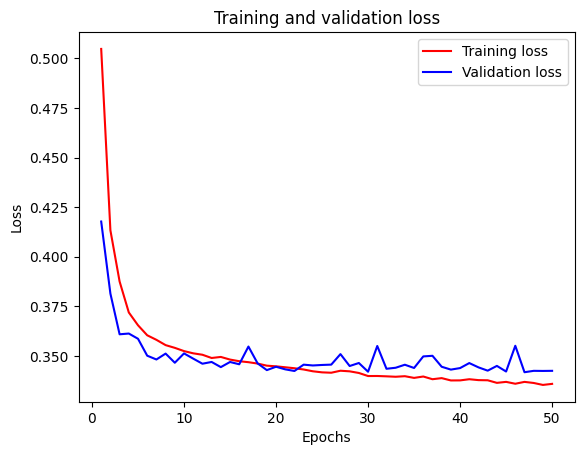

In [35]:
# model.save("bank-customer2.h5")

# plot loss and validation loss derived from training
import matplotlib.pyplot as plt
loss_values = history.history["loss"]
val_loss_values = history.history["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [36]:
# create confusion matrix
y_pred = model.predict(X_test)  # predictions for all input vectors in X_test
y_pred = (y_pred > 0.5) # creates a new array with true/false based on the boolean test

cm = confusion_matrix(y_test, y_pred)
print(cm)


63/63 [==============================] - 0s 2ms/step
[[1551   56]
 [ 218  175]]


2022-11-05 12:15:22.095082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [37]:
# make a single prediction
print(columnNames) # print column names so you can enter new data in the correct columns
new_input = [[596, 32, 3, 2, 0, 0, 1, 0]] # enter new data in 2D array
model.predict(new_input)

['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'IsActiveMember', 'Geography_France', 'Geography_Germany', 'Geography_Spain']
1/1 [==============================] - 0s 34ms/step


array([[0.06077746]], dtype=float32)